In [1]:
# IMAGE PROCESSING
import cv2 # OpenCV library
import numpy as np # Numpy library for matricies
import random
import math
from matplotlib import pyplot as plt # Matplotlib library for plotting
from collections import deque
import heapq

random.seed(42)

In [2]:
# General settings
seed = 42
image_file = "final_mask.png"

# Occupancy map
unsafe_iterations = 3

# BFS
size_of_node_grid = 9
bfs_start_node = 0
bfs_end_node = 99

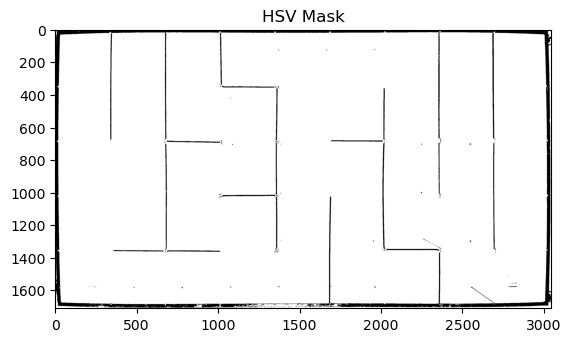

In [3]:
# Loading in the image
image = cv2.imread(image_file)

# img = cv2.imread("maze_obstacle.jpg")

#scale down the image by a factor of 4
# width = image.shape[1] * 4
# height = image.shape[0] * 4
# image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)
#     rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_grey = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
#convert source image to HSV color mode
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)






# hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower = np.array([0, 8, 104]) # 0 0 102
# upper = np.array([179, 255, 255]) # 179 255 224

# hsv_mask = cv2.inRange(hsv_image, lower, upper)

# # Display the mask
# plt.figure(1)
plt.imshow(image)
plt.title("HSV Mask")

plt.show()

In [4]:
def generate_buffer_zone(img, kernels, iteration):
    kernel = np.ones((kernels, kernels), np.uint8)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, obstacle = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)
    unsafe_zone = cv2.dilate(obstacle, kernel, iterations=iteration)
    unsafe_mask = np.logical_and(unsafe_zone == 255, obstacle == 0)
    img[unsafe_mask] = [255, 0, 0]    
    return img

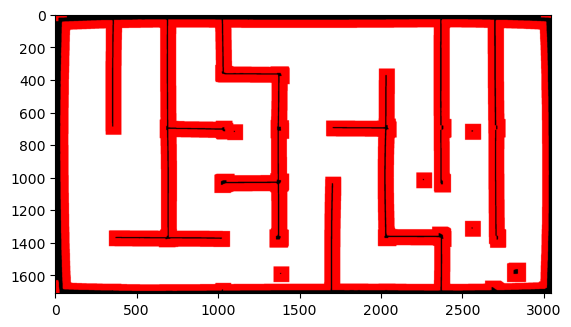

In [5]:
# # Applying Erosion + Dilation to the Image

# kernel = np.ones((7, 7), np.uint8)
# kernel3 = np.ones((3, 3), np.uint8)
# kernel4 = np.ones((2, 2), np.uint8)
    
# # Loading in the image
# image = cv2.imread(image_file)
# # hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # lower = np.array([0, 0, 99]) # 0 0 102
# # upper = np.array([179, 255, 255]) # 179 255 224

# # hsv_mask = cv2.inRange(hsv_image, lower, upper)

# # # Applying erosion to generate unsafe area
# eroded_image = cv2.erode(image, kernel, iterations = unsafe_iterations)

# kernel2 = np.ones((4, 4), np.uint8)
# kernel5 = np.ones((1, 1), np.uint8)

# # Applying dilation to clean up the image
# dilated_image = cv2.dilate(eroded_image, kernel2, iterations = 6)
# dilated_image2 = cv2.dilate(dilated_image, kernel3, iterations = 2)
# erode_image2 = cv2.erode(dilated_image2, kernel4, iterations = 3)
# dilTE123 = cv2.dilate(erode_image2,kernel4,iterations = 2)
# erode123 = cv2.erode(dilTE123,kernel4,iterations = 4)
# dilate12 = cv2.dilate(erode123,kernel4,iterations = 1)
# dilate13 = cv2.dilate(dilate12,kernel3,iterations = 1)
# dilate14 = cv2.dilate(dilate13,kernel4,iterations = 1)
# # dilate15 = cv2.dilate(dilate14,kernel4,iterations = 1)
# dilate16 = cv2.dilate(dilate14,kernel4,iterations = 1)
# erode123456 = cv2.erode(dilate16,kernel,iterations = 2)
# dilate16767 = cv2.dilate(erode123456,kernel,iterations = 2)
# erodeABCD = cv2.erode(dilate16767,kernel4,iterations = 2)
# DILATELAST = cv2.dilate(erodeABCD,kernel3,iterations = 1)

# FINALERODE = cv2.erode(DILATELAST,kernel,iterations = 3)
# dilatelast2 = cv2.dilate(FINALERODE,kernel,iterations = 3)
# FINALERODE2 = cv2.erode(dilatelast2,kernel3,iterations = 2)
# dilatelast3 = cv2.dilate(FINALERODE2,kernel3,iterations = 1)
# # dilatelast4 = 
# FINALERODE3 = cv2.erode(dilatelast3,kernel,iterations = 1)
# finaldilate = cv2.dilate(FINALERODE3, kernel, iterations = 1)
# lasttterode = cv2.erode(finaldilate,kernel4,iterations = 3)
# # Displays resulting image
# gray_image = plt.imshow(lasttterode)
# plt.show(gray_image)





kernel = np.ones((7, 7), np.uint8)
kernel3 = np.ones((3, 3), np.uint8)
kernel4 = np.ones((2, 2), np.uint8)
    
# Loading in the image
image = cv2.imread(image_file)
# hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower = np.array([0, 0, 99]) # 0 0 102
# upper = np.array([179, 255, 255]) # 179 255 224

# hsv_mask = cv2.inRange(hsv_image, lower, upper)

# Applying erosion to generate unsafe area
eroded_image = cv2.erode(image, kernel, iterations = unsafe_iterations)

kernel2 = np.ones((4, 4), np.uint8)
kernel5 = np.ones((1, 1), np.uint8)

# Applying dilation to clean up the image
dilated_image = cv2.dilate(eroded_image, kernel2, iterations = 6)
dilated_image2 = cv2.dilate(dilated_image, kernel3, iterations = 2)
erode_image2 = cv2.erode(dilated_image2, kernel4, iterations = 3)
dilTE123 = cv2.dilate(erode_image2,kernel4,iterations = 2)
erode123 = cv2.erode(dilTE123,kernel4,iterations = 4)
dilate12 = cv2.dilate(erode123,kernel4,iterations = 1)
dilate13 = cv2.dilate(dilate12,kernel3,iterations = 1)
dilate14 = cv2.dilate(dilate13,kernel4,iterations = 1)
# dilate15 = cv2.dilate(dilate14,kernel4,iterations = 1)
dilate16 = cv2.dilate(dilate14,kernel4,iterations = 1)
erode123456 = cv2.erode(dilate16,kernel,iterations = 2)
dilate16767 = cv2.dilate(erode123456,kernel,iterations = 2)
erodeABCD = cv2.erode(dilate16767,kernel4,iterations = 2)
DILATELAST = cv2.dilate(erodeABCD,kernel3,iterations = 1)

FINALERODE = cv2.erode(DILATELAST,kernel,iterations = 3)
dilatelast2 = cv2.dilate(FINALERODE,kernel,iterations = 3)
FINALERODE2 = cv2.erode(dilatelast2,kernel3,iterations = 2)
dilatelast3 = cv2.dilate(FINALERODE2,kernel3,iterations = 1)
# dilatelast4 = 
FINALERODE3 = cv2.erode(dilatelast3,kernel,iterations = 1)
finaldilate = cv2.dilate(FINALERODE3, kernel, iterations = 1)
lasttterode = cv2.erode(finaldilate,kernel4,iterations = 3)
# Displays resulting image




buffer_image = generate_buffer_zone(lasttterode,10,10)
gray_image = plt.imshow(buffer_image)
plt.show(gray_image)


In [6]:
class Node:
    def __init__(self, node_id, x, y):
        self.id = node_id
        self.x = x
        self.y = y
    
    def get_point(self):
        return (self.x, self.y)
    
    def get_ID(self):
        return self.id

class Graph:
    def __init__(self):
        self.nodes = {} # Keys are node IDs, Values are node objects
        self.edges = {} # Keys are node IDs, Values are objects containing neighbouring node ID and the weight

    def add_node(self, node_id, x, y):
        if node_id not in self.nodes:
            self.nodes[node_id] = Node(node_id, x, y)
            self.edges[node_id] = {}

    def add_edge(self, node_id1, node_id2, weight):
        if node_id1 in self.nodes and node_id2 in self.nodes:
            # Edges are bi-directional
            self.edges[node_id1][node_id2] = weight
            self.edges[node_id2][node_id1] = weight

    def remove_edge(self, node_id1, node_id2):
        if node_id1 in self.edges and node_id2 in self.edges[node_id1]:
            # Edges are bi-directional
            del self.edges[node_id1][node_id2]
            del self.edges[node_id2][node_id1]
    
    def get_nodes(self):
        return list(self.nodes.keys())
    
    def get_edge_weight(self, node_id1, node_id2):
        if node_id1 in self.edges and node_id2 in self.edges[node_id1]:
            return self.edges[node_id1][node_id2]
        return None
    
    def get_nodes_dict(self):
        return self.nodes
    
    def get_edges_dict(self):
        return self.edges

In [7]:
def path_clear(image, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    while True:
        if image[y1, x1].tolist() == [0, 0, 0]:
            return False
        if x1 == x2 and y1 == y2:
            break
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
#             err += dx
            y1 += sy
    return True

def find_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def prm_path_clear(image, x1, y1, x2, y2):
    
    distance = int(round(find_distance(x1, y1, x2, y2)))
    
    x_points = np.linspace(x1, x2, distance)
    y_points = np.linspace(y1, y2, distance)
    
    x_points = np.round(x_points).astype(int)
    y_points = np.round(y_points).astype(int)
    
    last_val = None
    for x, y in zip(x_points, y_points):
        
        if last_val is None:
            last_val = image[y, x].all()
        else:
            if last_val != image[y, x].all():
                return False
            else: 
                last_val = image[y, x].all()

    return True

def find_neighbours(graph, node_id):
    neighbours = []
    nodes = graph.get_nodes()
    for node in nodes:
        print('4')
        if graph.get_edge_weight(node_id, node) is not None and node != node_id:
            neighbours.append(node_id)
    return neighbours

def dijkstra(graph, start_id, goal_id):
    queue = [(0, start_id)]
    distances = {node.get_ID(): float('inf') for node in list(graph.get_nodes_dict().values())}
    distances[start_id] = 0
    parent = {node.get_ID(): None for node in list(graph.get_nodes_dict().values())}
    while queue:
        current_distance, current_id = heapq.heappop(queue)        
        if current_id == goal_id:
            break       
        for neighbor_id, weight in graph.edges[current_id].items():
            distance = current_distance + weight            
            if distance < distances[neighbor_id]:
                distances[neighbor_id] = distance
                parent[neighbor_id] = current_id
                heapq.heappush(queue, (distance, neighbor_id))    
    path = []
    current_id = goal_id
    while parent[current_id] is not None:
        path.insert(0, current_id)
        current_id = parent[current_id]
    path.insert(0, start_id)   
    return path, distances[goal_id]

[0, 36, 40, 22, 5, 6, 33, 34, 43, 44, 8]
['1300.0', 'l', '1308.0', 'l', '650.0', 'r', '727.6187188356275', '327.0', 'r', '975.0', 'l', '327.0', 'r', '325.0', 'l', '327.0', 'l', '1300.0']


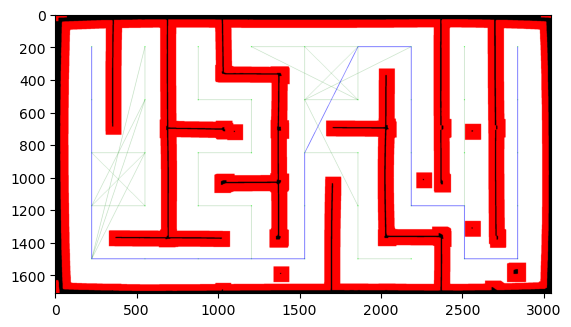

In [8]:
grid_image = buffer_image.copy()
# grid_image = cv2.cvtColor(erode123, cv2.COLOR_HSV2BGR)
height = grid_image.shape[1]
width = grid_image.shape[0]
# node_spacing_x = (width // (size_of_node_grid + 1))
# node_spacing_y = (height // (size_of_node_grid + 1))

x_nodes = 9
y_nodes = 5

node_spacing_x = width // (x_nodes + 1)
node_spacing_y = height // (y_nodes + 1)

# spacing right now is hard coded, need to watch out if the camera shifts or anything when taking photo

custom_node_spacing_y = 325
custom_node_spacing_x = 2950 // 9

bfs_graph = Graph()

# The following loops were generated with the help of ChatGPT:]

node_id = 0
for i in range(y_nodes):
    for j in range(x_nodes):
        x = 225 + j * custom_node_spacing_x
        y = 200 + i * custom_node_spacing_y
         
        bfs_graph.add_node(node_id, x, y)
        node_id += 1

# Creating nodes
# node_id = 0
# for i in range(1, size_of_node_grid + 1):
#     for j in range(1, size_of_node_grid + 1):
#         x = j * node_spacing_x
#         y = i * node_spacing_y
         
#         bfs_graph.add_node(node_id, x, y)
#         node_id += 1

# # Adding edges
# for i in range(size_of_node_grid):
#     for j in range(size_of_node_grid):
#         current_node_id = i * size_of_node_grid + j
#         x, y = bfs_graph.nodes[current_node_id].get_point()
#         # Connecting to the right with a weight of 1
#         if j + 1 < size_of_node_grid:
#             right_node_id = current_node_id + 1
#             if path_clear(grid_image, x, y, x + node_spacing_x, y):
#                 bfs_graph.add_edge(current_node_id, right_node_id, 1)
#         # Connecting down with a weight of 1
#         if i + 1 < size_of_node_grid:
#             down_node_id = current_node_id + size_of_node_grid
#             if path_clear(grid_image, x, y, x, y + node_spacing_y):
#                 bfs_graph.add_edge(current_node_id, down_node_id, 1)

nodes = bfs_graph.get_nodes()


for node_id in nodes:
    node_x, node_y = bfs_graph.nodes[node_id].get_point()
#     if node_id + 1 in nodes and node_id not in [8, 17, 26, 35, 44] != 0:
#         right_node_x, right_node_y = bfs_graph.nodes[node_id + 1].get_point()
#         if prm_path_clear(grid_image, node_x, node_y, right_node_x, right_node_y):
#             bfs_graph.add_edge(node_id, node_id + 1, 1)
#     if node_id + 9 in nodes:
#         down_node_x, down_node_y = bfs_graph.nodes[node_id + 9].get_point()
#         if prm_path_clear(grid_image, node_x, node_y, down_node_x, down_node_y):
#             bfs_graph.add_edge(node_id, node_id + 9, 1)

    for node_id_2 in nodes:
        if node_id_2 == node_id:
            continue
        node_2_x, node_2_y = bfs_graph.nodes[node_id_2].get_point()
        if prm_path_clear(grid_image, node_x, node_y, node_2_x, node_2_y):
            bfs_graph.add_edge(node_id, node_id_2, find_distance(node_x, node_y, node_2_x, node_2_y))

# Displaying nodes as light green circles with radius 3
for node_id in bfs_graph.get_nodes():
    node_obj = bfs_graph.nodes[node_id]
    x,y = node_obj.get_point();
    cv2.circle(grid_image, node_obj.get_point(), 3, (0, 255, 0), -1)

# Displaying edges as dark green lines with width 1
for node_id in bfs_graph.get_nodes():
    for neighbour_id, weight in bfs_graph.edges[node_id].items():
        node_obj = bfs_graph.nodes[node_id]
        neighbour_obj = bfs_graph.nodes[neighbour_id]
        cv2.line(grid_image, node_obj.get_point(), neighbour_obj.get_point(), (0, 125, 0), 1)

# Labeling first and last nodes
# cv2.putText(grid_image, '0', bfs_graph.nodes[0].get_point(), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
# cv2.putText(grid_image, '99', bfs_graph.nodes[size_of_node_grid*size_of_node_grid - 1].get_point(), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# continuous part starts on the 6th column and ends on the 9th

# nodes: 5 + 9... 

continuous_start = list(range(5, 42, 9))

# for i in continuous_start:
#     path, cost = dijkstra(bfs_graph, 0, i)
#     if path:
#         for node in path: 
#             if node in continuous_start and node != path[-1]:
#                 # if a valid path is found, but the path goes through the continuous start, don't use this path
#                 # and keep searching for a path that starts at tge continuous part
#                 continue
#         break

path, cost = dijkstra(bfs_graph, 0, 8)

print(path)

# converting path to commands
# looking at our code right now, i think there are 2 options
# 1. make the turning function be able to turn to any orientation (need it for continuous planning anyways),
#    then we can just call move forward and turn to whatever orientation we need
# 2. if we want to keep the maze movement as just forward, left and right then we'd need to keep track of 
#    the robots current orientation

# could try 2 since its simpler rn and we alr have turn left turn right
# for 2: 
# could identify 0, 1, 2, 3 as forward, right, down, left from the robot's current orientation, then
# keep track of the robot's current orientation and do (turn direction = global direction - current orientation)
# e.g. say robot's facing down (2), and the next path is right (1), then 1 - 2 = -1 + 4 = 3 therefore need to 
#      turn left

# + 4 if negative until positive

# now we have to consider that the dijkstra paths don't just go to the nearest node in the maze, it goes to the 
# cheapest one so it might jump directly

commands = []

# 0: up
# 1: right
# 2: down
# 3: left
# from perspective of camera

start_dir = 2

for i in range(1, len(path)):
    last_node = bfs_graph.nodes[path[i - 1]]
    curr_node = bfs_graph.nodes[path[i]]
    cv2.line(grid_image, curr_node.get_point(), last_node.get_point(), (0, 0, 255), 2)
    
    if curr_node.get_point()[0] - last_node.get_point()[0] < 0:
        global_dir = 3
    elif curr_node.get_point()[0] - last_node.get_point()[0] > 0:
        global_dir = 1
    elif curr_node.get_point()[1] - last_node.get_point()[1] < 0: 
        global_dir = 0
    elif curr_node.get_point()[1] - last_node.get_point()[1] > 0: 
        global_dir = 2
        
    if i == 1: 
        last_dir = start_dir
    else: 
        if bfs_graph.nodes[path[i-1]].get_point()[0] - bfs_graph.nodes[path[i-2]].get_point()[0] < 0:
            last_dir = 3
        elif bfs_graph.nodes[path[i-1]].get_point()[0] - bfs_graph.nodes[path[i-2]].get_point()[0] > 0:
            last_dir = 1
        elif bfs_graph.nodes[path[i-1]].get_point()[1] - bfs_graph.nodes[path[i-2]].get_point()[1] < 0: 
            last_dir = 0
        elif bfs_graph.nodes[path[i-1]].get_point()[1] - bfs_graph.nodes[path[i-2]].get_point()[1] > 0: 
            last_dir = 2
    
    next_dir = global_dir - last_dir
    
    if next_dir < 0: 
        next_dir += 4
    
    # strings format following what we used on our demo 
    # using two right turns to turn 180
#     if next_dir == 0:
# #         commands.append('f')
#         commands.append(find_distance(curr_node.get_point()[0], curr_node.get_point()[1], last_node.get_point()[0], last_node.get_point()[1]))
#     elif next_dir == 1: 
#         commands.append('r')
#         commands.append(find_distance(curr_node.get_point()[0], curr_node.get_point()[1], last_node.get_point()[0], last_node.get_point()[1]))
#     elif next_dir == 2: 
#         commands.append('rr')
#         commands.append(find_distance(curr_node.get_point()[0], curr_node.get_point()[1], last_node.get_point()[0], last_node.get_point()[1]))
#     elif next_dir == 3:
#         commands.append('l')
#         commands.append(find_distance(curr_node.get_point()[0], curr_node.get_point()[1], last_node.get_point()[0], last_node.get_point()[1]))

    if next_dir == 1: 
        commands.append('r')
    elif next_dir == 2: 
        commands.append('rr')
    elif next_dir == 3:
        commands.append('l')
    commands.append(str(find_distance(curr_node.get_point()[0], curr_node.get_point()[1], last_node.get_point()[0], last_node.get_point()[1])))


print(commands)
    
# Displaying resulting image
plt.imshow(grid_image)
plt.show()